In [133]:
import numpy, scipy, matplotlib.pyplot as plt, pandas as pd
import sklearn, IPython.display as ipd
import librosa, librosa.display

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from pathlib import Path
%matplotlib inline

In [93]:
c1_signals = [
    librosa.load(p, duration=30, offset=10)[0] for p in Path().glob('audio/train/c1/*.mp3')
]
c2_signals = [
    librosa.load(p, duration=30, offset=10)[0] for p in Path().glob('audio/train/c2/*.mp3')
]

In [94]:
print(len(c1_signals))
print(len(c2_signals))

100
100


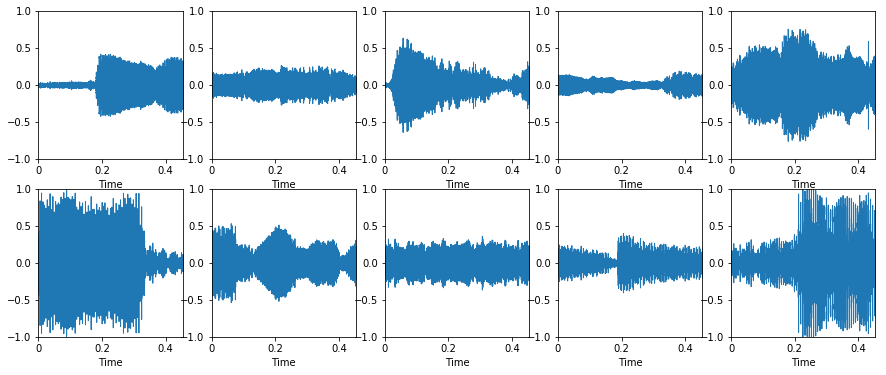

In [95]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(c1_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [96]:
ipd.Audio(c1_signals[5], rate=22050)

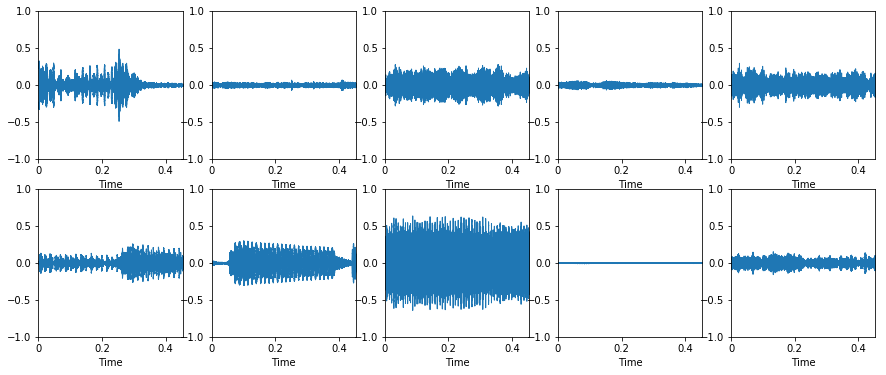

In [97]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(c2_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [98]:
n_mfcc = 12
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.mfcc(signal, n_mfcc=n_mfcc).T[0, 0],
        librosa.feature.melspectrogram(signal)[0, 0]
    ]

In [99]:
c1_features = numpy.array([extract_features(x) for x in c1_signals])
c2_features = numpy.array([extract_features(x) for x in c2_signals])

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


In [100]:
print(c1_features.shape)
print(c2_features.shape)

(100, 4)
(100, 4)


In [101]:
#scaler = sklearn.preprocessing.StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))

c1_features_scaled = scaler.fit_transform(c1_features)
print(c1_features_scaled.mean(axis=0))
print(c1_features_scaled.std(axis=0))

c2_features_scaled = scaler.transform(c2_features)
print(c2_features_scaled.mean(axis=0))
print(c2_features_scaled.std(axis=0))

[-0.48218527 -0.56117853  0.36229667 -0.88465501]
[0.37087445 0.28193247 0.33972728 0.3208449 ]
[-0.57083135 -0.52069377  0.14236413 -0.30747734]
[0.3494818  0.32516196 0.33205881 2.71901158]


In [102]:
features = numpy.vstack((c1_features_scaled, c2_features_scaled))
print(features.shape)
print(features.min(axis=0))
print(features.max(axis=0))

(200, 4)
[-1.03325416 -1.07035774 -1.         -1.0000003 ]
[ 1.          1.          1.         18.72032157]


In [103]:
labels = numpy.concatenate((numpy.zeros(len(c1_features_scaled)), numpy.ones(len(c2_features_scaled))))

In [104]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [105]:
# Support Vector Machine
model = sklearn.svm.SVC()

In [106]:
model.fit(features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
c1_test_signals = [
    librosa.load(p, duration=30, offset=60)[0] for p in Path().glob('audio/test/c1/*.mp3')
]
c2_test_signals = [
    librosa.load(p, duration=30, offset=60)[0] for p in Path().glob('audio/test/c2/*.mp3')
]

In [121]:
print(len(c1_test_signals))
print(len(c2_test_signals))

25
25


In [122]:
c1_test_features = numpy.array([extract_features(x) for x in c1_test_signals])
c2_test_features = numpy.array([extract_features(x) for x in c2_test_signals])

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


In [123]:
print(c1_test_features.shape)
print(c2_test_features.shape)

(25, 4)
(25, 4)


In [124]:
c1_test_features_scaled = scaler.transform(c1_test_features)
c2_test_features_scaled = scaler.transform(c2_test_features)

In [125]:
features_test = numpy.vstack((c1_test_features_scaled, c2_test_features_scaled))

In [126]:
labels_test = numpy.concatenate((numpy.zeros(len(c1_test_features)), numpy.ones(len(c2_test_features))))

In [127]:
labels_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [128]:
predicted_labels = model.predict(features_test)

In [129]:
predicted_labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

In [130]:
score = model.score(features_test, labels_test)

In [131]:
score

0.7

In [134]:
roc_auc_score(labels_test, predicted_labels)

0.7000000000000002

In [ ]:
score = model.score(test_features, test_labels)
roc_auc = roc_auc_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
fmeasure = f1_score(test_labels, predicted_labels)
r2 = r2_score(test_labels, predicted_labels)

In [ ]:
results = [score, roc_auc, recall, precision, fmeasure, r2]
result_labels = ['accuracy', 'roc_auc', 'recall', 'precision', 'fmeasure', 'r2_score']

In [ ]:
pd.DataFrame(results, result_labels)